### SERVO PREDICTION USING LINEAR REGRESSION

What is Servo?
In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.
A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:
1. Motor A,B,C,D,E
2. Screw A,B,C,D,E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#import data 
df=pd.read_csv("Servo Mechanism.csv")

In [4]:
#head and tail of dataframe
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
df.tail()

,Motor,Screw,Pgain,Vgain,Class
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44
166,A,A,6,5,20


In [7]:
#info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


In [8]:
#summary of df
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [10]:
#column names
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [11]:
#shape of df
df.shape

(167, 5)

In [12]:
#counts of each type of all columns
df[["Motor"]].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [13]:
df[["Screw"]].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [14]:
df[["Pgain"]].value_counts()

Pgain
4        66
3        50
5        26
6        25
Name: count, dtype: int64

In [15]:
df[["Vgain"]].value_counts()

Vgain
2        49
1        47
3        27
4        22
5        22
Name: count, dtype: int64

In [16]:
df.isnull().sum()

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64

In [22]:
#encoding of object datatype
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [23]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [31]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


In [32]:
#target and feature selection
x=df[['Motor', 'Screw', 'Pgain', 'Vgain']]


In [34]:
y=df["Class"]

In [35]:
x.shape

(167, 4)

In [36]:
y.shape

(167,)

In [37]:
#train test split
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529,test_size=0.3)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [44]:
import seaborn as sns

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

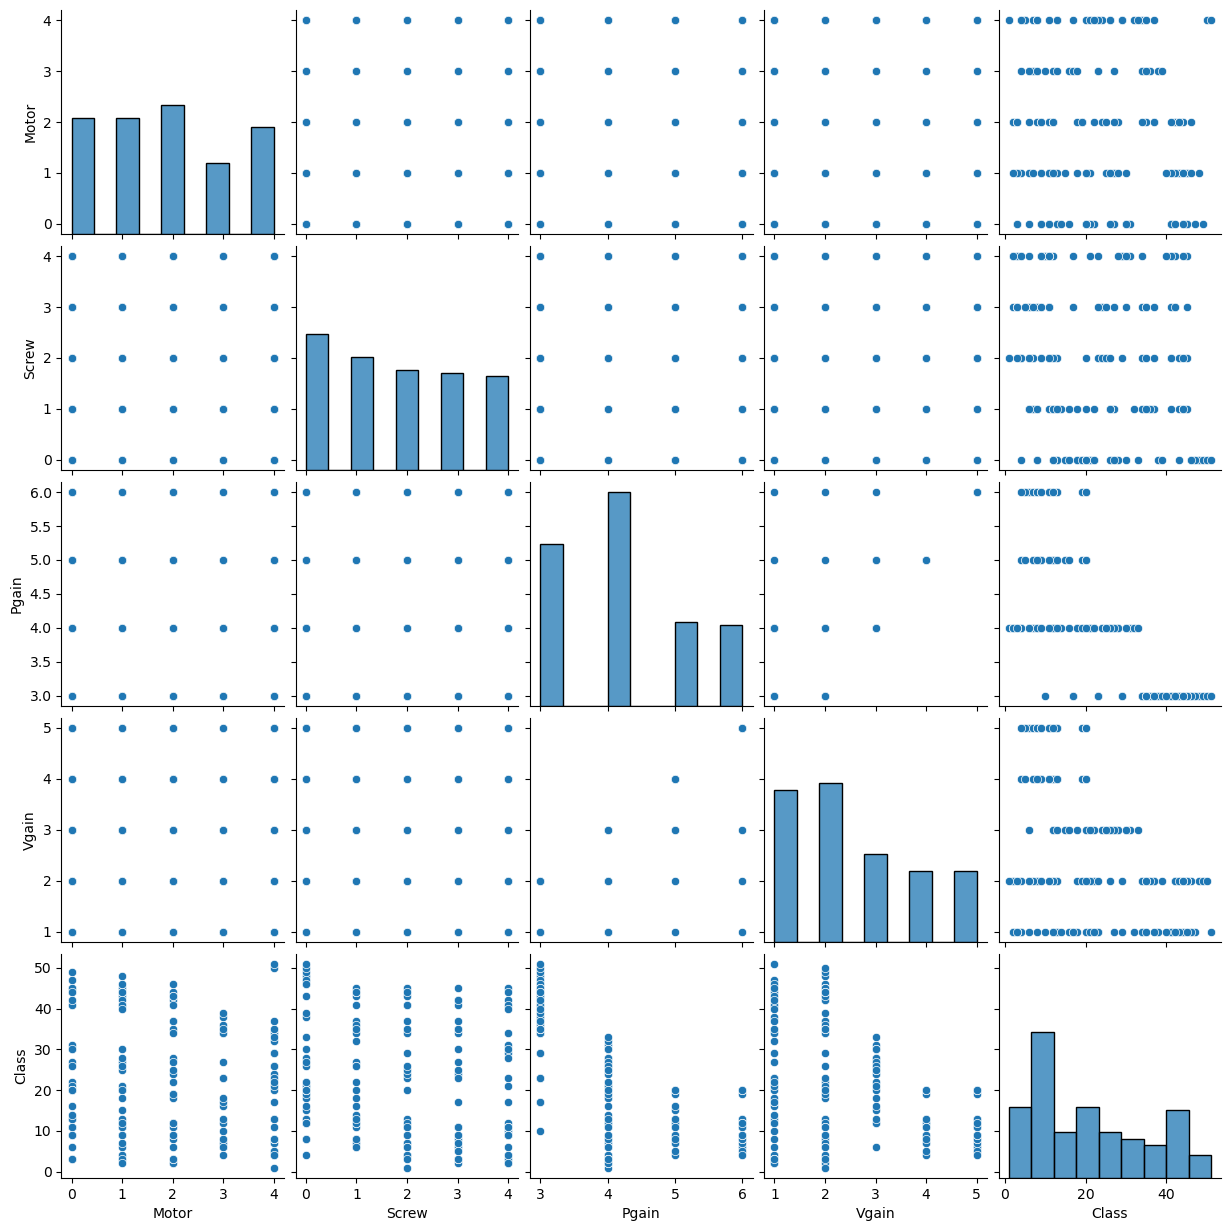

In [47]:
sns.pairplot(data=df)
plt.show()

In [41]:
#model training
from sklearn.linear_model import LinearRegression

In [42]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
#prediction
ypred=lr.predict(x_test)

In [50]:
ypred.shape

(51,)

In [51]:
y_test.head()

35     29
107    34
127     8
115    21
160    39
Name: Class, dtype: int64

In [53]:
pd.DataFrame(ypred).head()

,0
0,24.559453
1,30.987651
2,18.544855
3,25.515242
4,38.560820


In [54]:
#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
mean_squared_error(y_test,ypred)

66.03589175595567

In [56]:
mean_absolute_error(y_test,ypred)

7.190539677251238

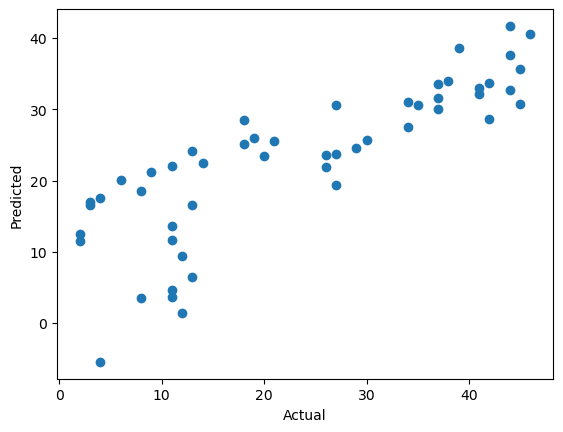

In [62]:
#y_test vs ypred
plt.scatter(y_test,ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [67]:
arr=list(lr.coef_)

In [68]:
arr

[-2.0432237796551593,
 -2.989535966387069,
 -14.591615932811274,
 4.583633202849262]

In [69]:
c=lr.intercept_

In [71]:
x1=int(input("Enter motor"))

2


In [72]:
x2=int(input("enter screw"))

enter screw3


In [73]:
x3=int(input("enter pgain"))

enter pgain5


In [74]:
x4=int(input("enter vgain"))

enter vgain3


In [75]:
yp=arr[0]*x1+ arr[1]*x2 + arr[2]*x3 + arr[3]*x4 + c

In [76]:
yp

7.035837444078211